# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [4]:
! git clone https://github.com/ds4e/EDA


fatal: destination path 'EDA' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
![#1 work](</content/EDA/assignment/q1.jpeg>)

2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
![#2 work](</content/EDA/assignment/q1.jpeg>)

3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
![#3 work](</content/EDA/assignment/q1.jpeg>)

4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [ ]:
# 1:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_fg = pd.read_csv('/content/EDA/assignment/data/ForeignGifts_edu.csv')
df_fg.head()



,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


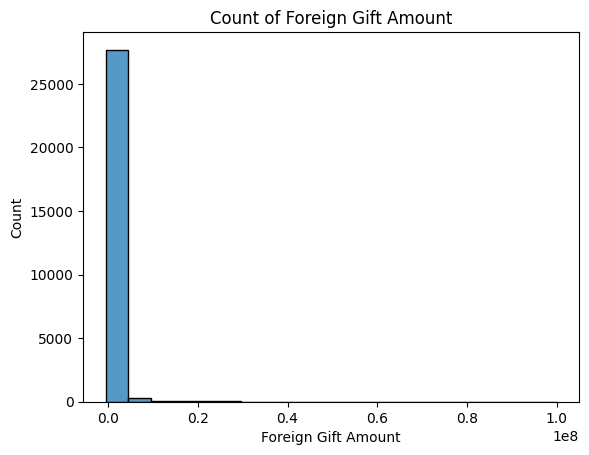

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


In [ ]:
#2


var = 'Foreign Gift Amount'
x = sns.histplot(data=df_fg, x=var, bins=20)
x.set_title('Count of Foreign Gift Amount')
plt.show()

df_fg[var].describe()


It seems like most (75%) of the Foreign Gifts are in the \$0 to \$376,142 range. However, the other 25% in the upper echelon are much larger leading a right skew. There are also negative numbers which doesn't seem to make much sense.

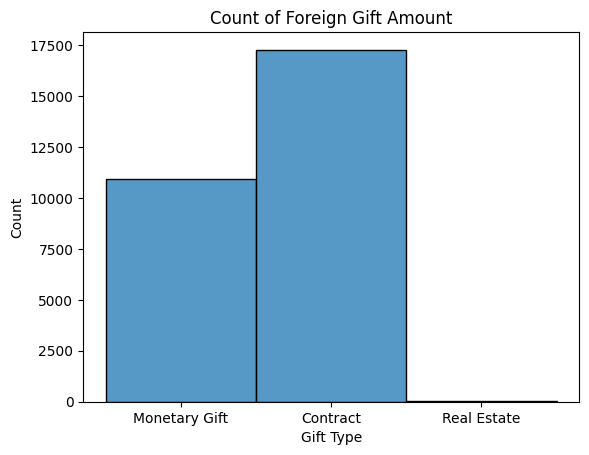

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [ ]:
# 2
var = 'Gift Type'
x = sns.histplot(data=df_fg, x=var, bins=20)
x.set_title('Count of Foreign Gift Amount')
plt.show()

df_fg[var].value_counts()



The proportion of the gifts are contracts, real estate, and monetary gifts are 17274:10936:11 -> contract: monetary: real estate.
* contract: 17274/28221
* monetary: 10936/28221
* real estate: 11/28221


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


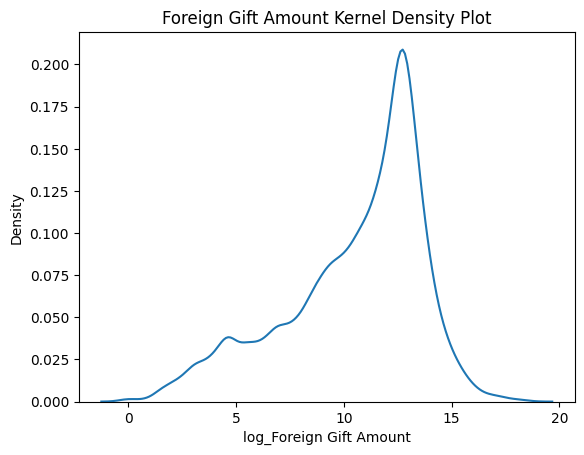

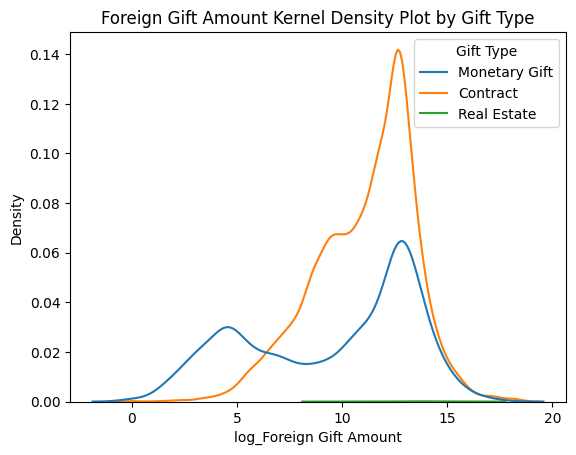

In [ ]:
# 4

df_fg['log_Foreign Gift Amount'] = np.log(df_fg['Foreign Gift Amount'])

var = 'log_Foreign Gift Amount'

x = sns.kdeplot(data=df_fg, x=var)
x.set_title('Foreign Gift Amount Kernel Density Plot')

plt.show()

y = sns.kdeplot(data=df_fg, x=var, hue='Gift Type')
y.set_title('Foreign Gift Amount Kernel Density Plot by Gift Type')

plt.show()



One pattern I noticed is the contract had a left skew. Its peak is much higher then the other graphs. Meanwhile, Monetary gifts seems to have a bimodal distribution.

In [ ]:
# 5
df_fg['Country of Giftor'].value_counts().head(15)




,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [ ]:
# 5

df_fg.groupby('Country of Giftor').sum()['Foreign Gift Amount'].sort_values(ascending=False).head(15)


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [ ]:
# 6
df_fg_amount = df_fg.groupby('Institution Name').sum()['Foreign Gift Amount'].sort_values(ascending=False)


df_fg_amount.head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


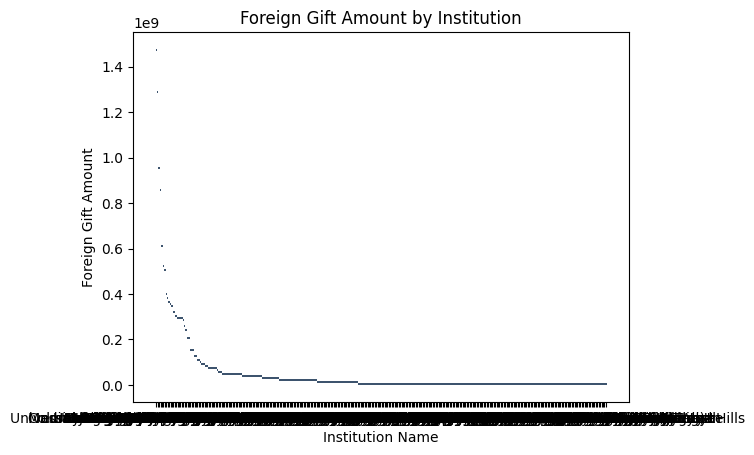

In [ ]:
#
df_fg_amount = df_fg_amount.reset_index()


var = 'Institution Name'
var2 = 'Foreign Gift Amount'
x = sns.histplot(data=df_fg_amount, x=var, y = var2)
x.set_title('Foreign Gift Amount by Institution')
plt.show()


# a histogram does not work for this

In [ ]:
df_fg_amount = df_fg.groupby('Giftor Name').sum()['Foreign Gift Amount'].sort_values(ascending=False)


df_fg_amount.head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [ ]:
# 1

df_airbnb = pd.read_csv('/content/EDA/assignment/data/airbnb_hw.csv')


In [ ]:
# 2
print(df_airbnb.shape)
df_airbnb.info()
df_airbnb.head()


(30478, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int6

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


The table has 30478 rows and 13 columns. So, there are 30478 observations.

The variables are: Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number Of Reviews, Price, Review Scores Rating




In [ ]:
#3

pd.crosstab(df_airbnb['Room Type'], df_airbnb['Property Type'])



Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


Entire home/apt is the most common type for apartment. However,there are also a lot of Private rooms as well. It is interesting that there is one tree house, yet its only a private room at a tree house. Smaller property types seem to be more likely with entire home/apt room types.

Private rooms are located mostly in houses. Bed & Breakfest and dorm also are more common for a private room as well.

In [ ]:
# Have to turn Price col numeric

var = 'Price'

df_airbnb[var] = pd.to_numeric(df_airbnb[var], errors='coerce')


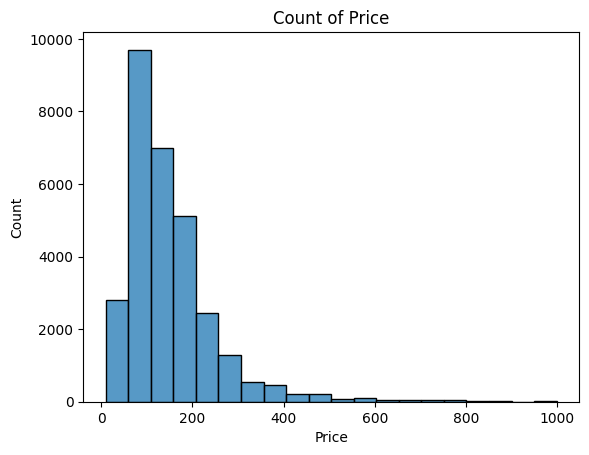

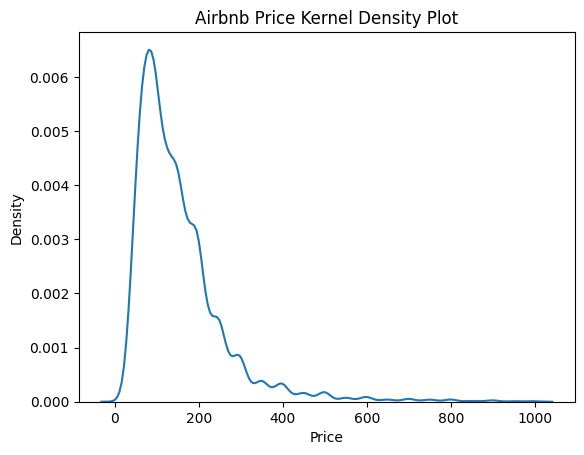

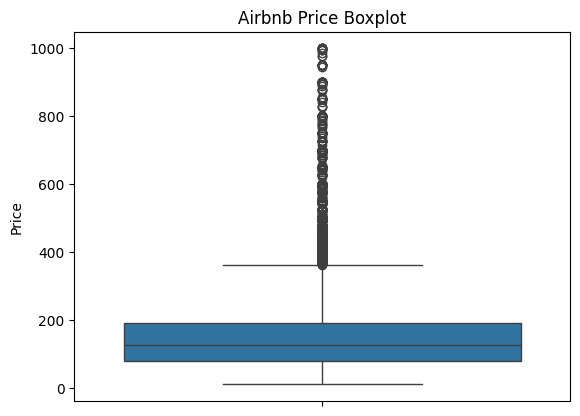

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


In [ ]:
var = 'Price'
x = sns.histplot(data=df_airbnb, x=var, bins=20)
x.set_title('Count of Price')
plt.show()



y = sns.kdeplot(data=df_airbnb, x=var)
y.set_title('Airbnb Price Kernel Density Plot')

plt.show()

z = sns.boxplot(df_airbnb[var])
z.set_title('Airbnb Price Boxplot')

plt.show()

df_airbnb[var].describe()


The data is badly scaled because most of the data is within the 192 price range (75% of it to be exact), yet the max is 999 and there are a lot of outliers.

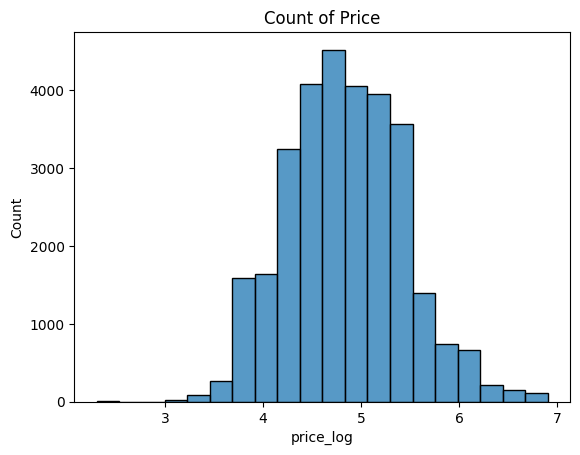

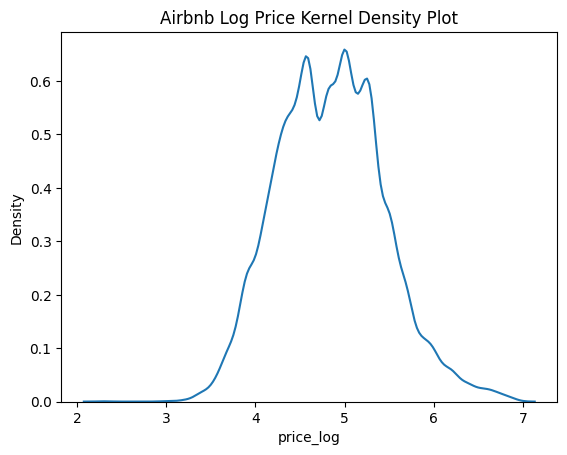

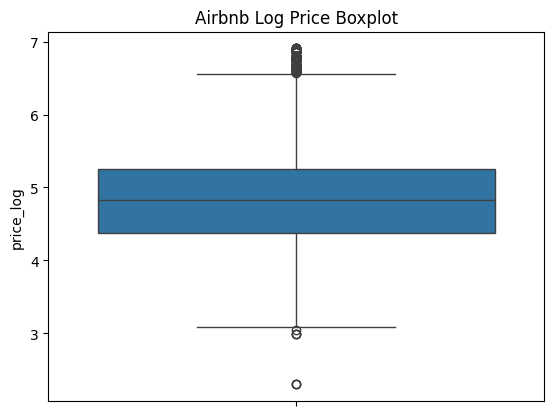

,price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


In [ ]:
df_airbnb['price_log'] = np.log(df_airbnb['Price'])
var = 'price_log'
x = sns.histplot(data=df_airbnb, x=var, bins=20)
x.set_title('Count of Price')
plt.show()



y = sns.kdeplot(data=df_airbnb, x=var)
y.set_title('Airbnb Log Price Kernel Density Plot')

plt.show()

z = sns.boxplot(df_airbnb[var])
z.set_title('Airbnb Log Price Boxplot')

plt.show()

df_airbnb[var].describe()


The data looks a lot more scaled. The outliers are no longer as far from the rest of observations.

<Axes: xlabel='Beds', ylabel='price_log'>

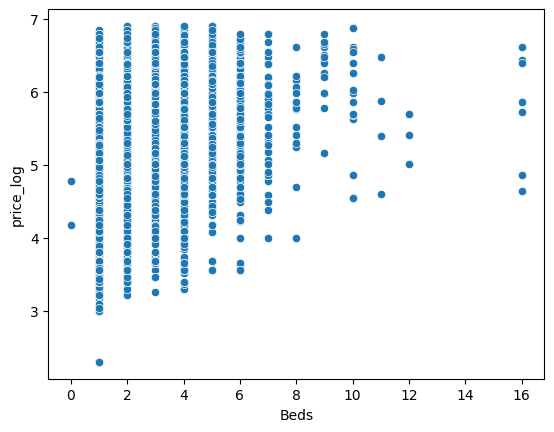

In [ ]:
#5
sns.scatterplot(data=df_airbnb,x='Beds', y='price_log')


It seems like as the amount of beds go up, the average price goes up. The each amount of bed has a very high upper range price, but as the bed total increases, the lower range/mean increases

In [ ]:
df_airbnb.groupby('Beds').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


As said before, as beds increase, the average price goes up. Also, the standard deviation in prices increase generally (not at 12 beds) as the price increases.  

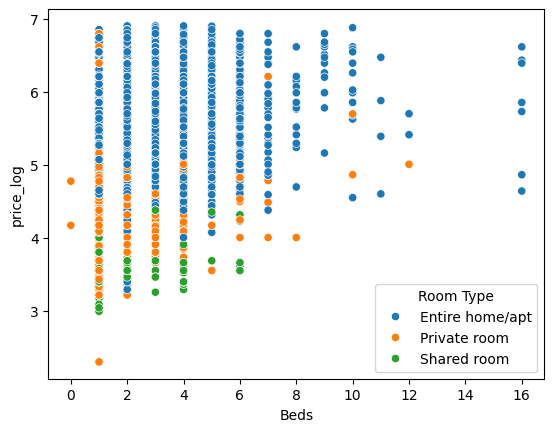

<Axes: xlabel='Beds', ylabel='price_log'>

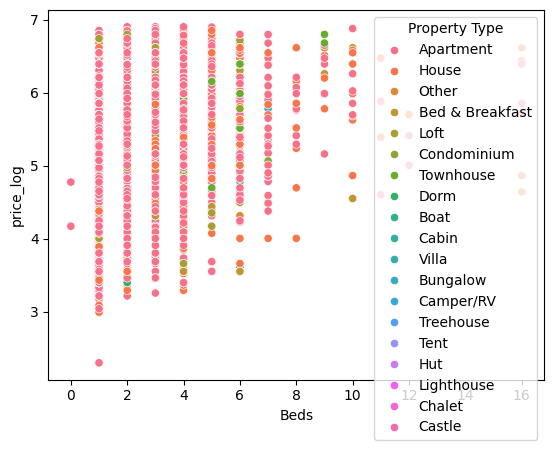

In [ ]:
# 6
sns.scatterplot(data=df_airbnb,x='Beds', y='price_log', hue = 'Room Type')
plt.show()
sns.scatterplot(data=df_airbnb,x='Beds', y='price_log', hue = 'Property Type')


Based on the patterns the most expensive room type is Entire home/apt, with second being Private room, and third being shared room. This makes sense because that is the order from having all the space to yourself, to sharing more space.

For property type it seems like apartments have less beds on average and are cheaper, while houses have more beds and are more expensive.  

In [ ]:
# 6

df_airbnb.groupby(['Room Type', 'Property Type']).describe()['Price']

count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.00  985.0  
                Other            123.75  177.5  350.00  850.0  
                Townhouse        135.00  189.0  295.00  900.0  

The other Property type seems to have the highest prices on average. While Entire home/apt has the highest prices on average for room type.

Other also has the highest standard deviation.

The mean does not seem to be reliable in this case because there are not a lot of certain groups. For example, Entire home/apt and other properties only have 10 observation. That means one outlier can skew the data heavily. So, a lot of these means are very skewed. The median on the other hand is not effected by outliers because it picks the middle point.

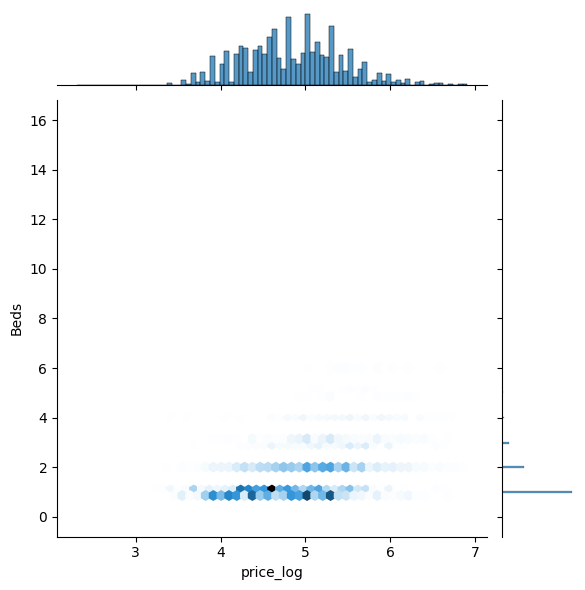

In [ ]:
# 7

sns.jointplot(data=df_airbnb, x='price_log' , y='Beds', kind='hex')


The price data is distributed in the middle while the beds data is skewed on the lower end. This makes me wonder how many of the price trends would be different if different types of rentals offered more bedding options. The higher bed options are a lot more rare. It still confirms that median is more accurate due to some of the groups having less observations.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.




1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.